In [1]:
import pandas as pd
from sqlalchemy import create_engine
import yfinance as yf
import matplotlib.pyplot as plt

In [2]:
engine = create_engine('sqlite:///TEST_DB.db')

In [9]:
def sql_importer2(symbol, start='2022-11-09'):
    try:
        max_date=pd.read_sql(f'SELECT MAX (Date) FROM {symbol}', engine).values[0][0]
        print(max_date)
        new_data=yf.download(symbol,start= pd.to_datetime(start))
        new_rows= new_data[new_data.index > max_date]
        new_rows.to_sql(symbol, engine, if_exists='append')
        print(str(len(new_rows))+' New rows importet to DB')
        #return new_data
    except:
        new_data=yf.download(symbol,start=start)
        new_data.to_sql(symbol,engine)
        print(f'New Tabele Craeted for {symbol} with {str(len(new_data))} rows')
        #return new_data

In [10]:
stocks=['ABT','DHR','LLY', 'UNP','PG','NSRGY','PEP','CHD', 'AAPL', 'WM', 'SBUX','TMO','SBUX','EQIX', 'DE','ASML','COST', 'UNH','AMZN', 'GOOG', 'LMT']


2023-03-01 00:00:00.000000
[*********************100%***********************]  1 of 1 completed
0 New rows importet to DB
2023-03-01 00:00:00.000000
[*********************100%***********************]  1 of 1 completed
0 New rows importet to DB
2023-03-01 00:00:00.000000
[*********************100%***********************]  1 of 1 completed
0 New rows importet to DB
2023-03-01 00:00:00.000000
[*********************100%***********************]  1 of 1 completed
0 New rows importet to DB
2023-03-01 00:00:00.000000
[*********************100%***********************]  1 of 1 completed
0 New rows importet to DB
2023-03-01 00:00:00.000000
[*********************100%***********************]  1 of 1 completed
0 New rows importet to DB
2023-03-01 00:00:00.000000
[*********************100%***********************]  1 of 1 completed
0 New rows importet to DB
2023-03-01 00:00:00.000000
[*********************100%***********************]  1 of 1 completed
0 New rows importet to DB
2023-03-01 00:00:00.0000

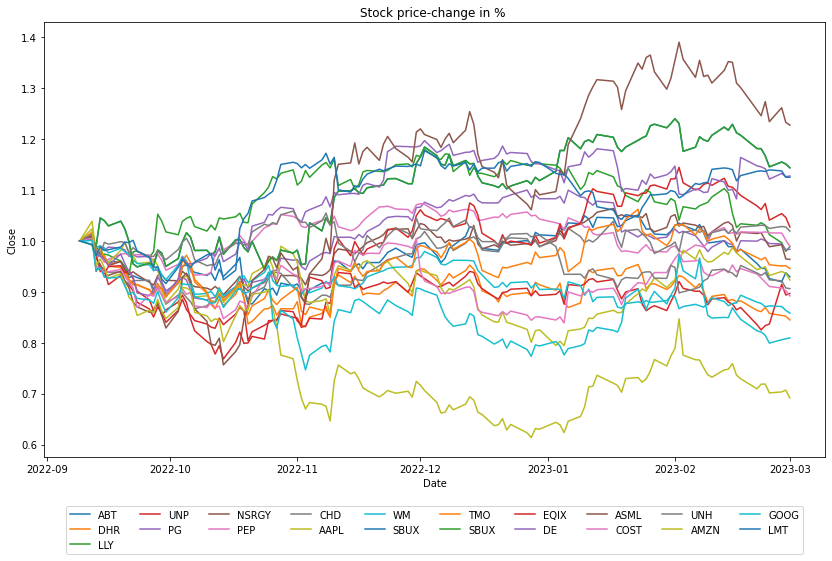

In [20]:

fig, ax = plt.subplots(figsize=(14,8))

for stock in stocks:
    sql_importer2(stock);
    data = pd.read_sql(stock, engine)
    first_close = data.loc[data.index[0], 'Close']
    # Plot the data
    ax.plot(data['Date'], data['Close']/first_close, label=stock)


ax.set_xlabel('Date')
ax.set_ylabel('Close')
ax.set_title('Stock price-change in % ')
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=int(len(stocks)/2))